In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Quick processing: rocklin to FASTA
data from: https://github.com/duerrsimon/mars-biohackathon
* [Multi-mutant](https://github.com/duerrsimon/mars-biohackathon/blob/main/data/multiple_muts_train.csv)
* [Single-mutant](https://github.com/duerrsimon/mars-biohackathon/blob/main/data/single_muts_train.csv)

In [5]:
df = pd.read_csv("~/storage/data/rocklin/rocklin_single_mutant.csv")
df[df.stabilityscore > 0.].shape

(8521, 5)

In [7]:
df2 = pd.read_csv("~/storage/data/rocklin/rocklin_multi_mutant.csv")
df2.head()

,Unnamed: 0,name,sequence,secondary_structure,stabilityscore
0,0,EHEE_rd1_0392.pdb,GSSTETYEVHTTDEAERVRKELEKKGYKVEVRSDGTEYEIRSE,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,-0.32
1,1,EHEE_rd1_0925.pdb_random,GSSEKEDVHRFEIATWERDKQLEERTGREGRTRDIANREDERE,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,-0.50
2,2,HEEH_rd1_0699.pdb_hp,EARKSDGPSGVKRAKKNEDKETDRKTALYNKIQRVAKEITENE,THHHHHHHHHHHHHTTEEEETTEEEETTTHHHHHHHHHHHHHT,-0.33
3,3,EEHEE_rd1_0108.pdb_hp,GSAQFKNGNEESEVPYKGRRVKQEPKKDANEWERQGTEGRSDG,TEEEETTEEEETTTHHHHHHHHHHHHHHHTTTEEEETTEEEET,-0.18
4,4,EEHEE_rd1_0483.pdb,GSGTVELNGNRYTSNSEEDIREWIRRQGATTSETSNGKYQVHR,TEEEETTEEEETTTHHHHHHHHHHHHHHHTTTEEEETTEEEET,-0.12


Let's use the multi mutant dataset and filter out for those with a stability score > 0.1:

In [17]:
print(df2.shape)
print(df2[df2.stabilityscore > 0.1].shape)

(29187, 5)
(9903, 5)


In [37]:
df3 = df2[df2.stabilityscore > 0.1] 
print(df3.shape)
df3 = df3.drop_duplicates(subset="sequence", keep="first")
print(df3.shape)

(9903, 5)
(9880, 5)


In [38]:
# df3.to_csv("../rocklin_multi_mutant_stable.csv")

In [41]:
df3.sequence.str.len().max()

43

In [42]:
df3.sequence

28       GSRSGNFGGKSKSPTDWTVKTTATKYAKADTTKDEYGKERLDT
30       GSADLTVGNKQFDGADDENQKRARETAGGTHVERDGNTVQVKK
33       SDSKEEARRRAKKKNTKVTVNGVTVRAETEEAEKRAEEWLRRQ
37       SEEERERAREKARRGEPIKVNGEEWEKPSTELAERLADKKANG
41       GSGESRFKGQRVETDNPKELAEREARKVNGPFTQTNGRVEVQV
                            ...                     
29176    GTDESTNYTYTAPSTDAARKFAQELAKQLGLKVTEKNGTFKVT
29178    TWEAAQRVLQALKDNKPITINGVTFTPGNPEVKKWDKKVANAK
29181    GSHTLKVGNKEYTFPSWKEAEKFAKKVGAKKVTVKNGTVEVHQ
29184    PAAQKAADELKKGATNVTVTLNGKKITLTATSPEEAEKAVKKF
29186    TKVHVNGKTYTFPSPDLAKKFAEKVAKKYNLTVHVDGNTVKVK
Name: sequence, Length: 9880, dtype: object

In [43]:
from plaid.utils import write_to_fasta

In [45]:
# write_to_fasta(df3.sequence.values, "rocklin_stable.fasta", df3.name.values)

Wrote 9880 sequences to rocklin_stable.fasta.


# Examine perplexity of rocklin dataset

In [46]:
from plaid.evaluation import RITAPerplexity
import torch

device = "cuda"

perplexity_calculator = RITAPerplexity(device)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [50]:
sequences = list(df3.sequence.values)
perplexity_calculator.batch_eval(sequences, batch_size=256)

15.40421669299786

# Structure

In [3]:
sequences_df = pd.read_csv("/data/lux70/data/rocklin/rocklin_multi_mutant_stable.csv")
print(sequences_df.shape)
sequences_df.head()

(9880, 6)


,Unnamed: 0.1,Unnamed: 0,name,sequence,secondary_structure,stabilityscore
0,28,28,EEHEE_rd1_0657.pdb_hp,GSRSGNFGGKSKSPTDWTVKTTATKYAKADTTKDEYGKERLDT,TEEEETTEEEETTTHHHHHHHHHHHHHHHTTTEEEETTEEEET,0.43
1,30,30,EEHEE_rd1_0070.pdb,GSADLTVGNKQFDGADDENQKRARETAGGTHVERDGNTVQVKK,TEEEETTEEEETTTHHHHHHHHHHHHHHHTTTEEEETTEEEET,0.44
2,33,33,HEEH_rd1_0524.pdb,SDSKEEARRRAKKKNTKVTVNGVTVRAETEEAEKRAEEWLRRQ,THHHHHHHHHHHHHTTEEEETTEEEETTTHHHHHHHHHHHHHT,0.43
3,37,37,HEEH_rd1_0724.pdb,SEEERERAREKARRGEPIKVNGEEWEKPSTELAERLADKKANG,THHHHHHHHHHHHHTTEEEETTEEEETTTHHHHHHHHHHHHHT,0.45
4,41,41,EEHEE_rd1_0095.pdb,GSGESRFKGQRVETDNPKELAEREARKVNGPFTQTNGRVEVQV,TEEEETTEEEETTTHHHHHHHHHHHHHHHTTTEEEETTEEEET,0.21


In [4]:
import os
struct_files_dir = "/data/lux70/data/rocklin/structures/"
structure_files = os.listdir(struct_files_dir)
print(len(structure_files))

16463


In [5]:
print(len(sequences_df.name.unique()))
print(len(sequences_df.name.map(lambda x: x.split(".")[0]).unique()))

9880
6989


In [6]:
len(set(sequences_df.name).intersection(set(structure_files)))

4731

In [7]:
files_to_examine = list(set(sequences_df.name).intersection(set(structure_files)))
print(files_to_examine[:10])

['EEHEE_rd1_1005.pdb', 'HEEH_rd1_0287.pdb', 'EEHEE_rd3_0101.pdb', 'HEEH_rd1_0805.pdb', 'HEEH_rd3_0481.pdb', 'HEEH_rd3_1138.pdb', 'EHEE_rd2_1018.pdb', 'HHH_rd1_0113.pdb', 'HEEH_rd3_1617.pdb', 'HHH_rd2_0215.pdb']


In [8]:
from plaid.utils import view_py3Dmol

for i in range(4):
    fpath = struct_files_dir + files_to_examine[i]
    with open(fpath, "r") as f:
        pdbstr = f.read()
    view_py3Dmol(pdbstr)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [9]:
predicted_pdb_strs_dir = "/data/lux70/data/rocklin/esmfold_predicted_structures/val/" 
print(len(os.listdir(predicted_pdb_strs_dir)))
print(len(set(os.listdir(predicted_pdb_strs_dir)).intersection(set(files_to_examine))))

1976
932


In [10]:
files_to_examine = list(set(os.listdir(predicted_pdb_strs_dir)).intersection(set(files_to_examine)))
from plaid.evaluation import run_tmalign

scores = []
for filename in files_to_examine:
    scores.append(run_tmalign(f"{struct_files_dir}{filename}", f"{predicted_pdb_strs_dir}{filename}")) 


Text(0.5, 1.0, 'TMScore of ESMFold predicted structure to original on Rocklin miniproteins')

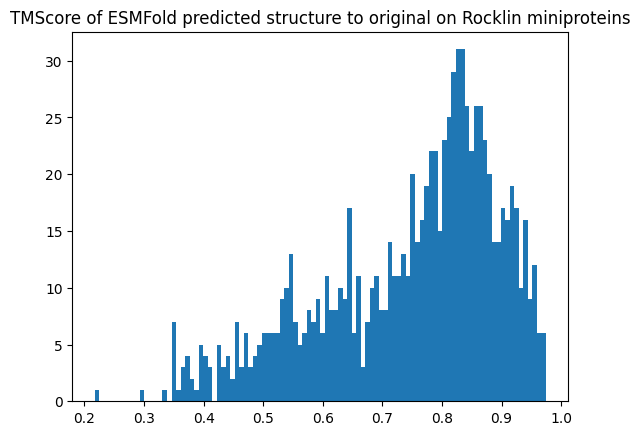

In [11]:
import matplotlib.pyplot as plt
_ = plt.hist(scores, bins=100)
plt.title("TMScore of ESMFold predicted structure to original on Rocklin miniproteins")

In [56]:
from plaid.utils import StructureFeaturizer

del gt_features
gt_features = {}
structure_featurizer = StructureFeaturizer()

for file in os.listdir(struct_files_dir):

def parse_features(fpath):
    # fpath = f"{struct_files_dir}{file}"
    with open(fpath, "r") as f:
        pdbstr = f.read()
    return structure_featurizer(pdbstr, seq_len=43)
    # gt_features[file] = feat
    # print("added", file)

In [43]:
from plaid.esmfold import esmfold_v1
from openfold.utils.loss import backbone_loss

esmfold = esmfold_v1()
device = "cuda"
esmfold = esmfold.to(device)

In [44]:
from evo.dataset import FastaDataset
ds = FastaDataset("/data/lux70/data/rocklin/rocklin_stable.fasta")

100%|██████████| 639k/639k [00:00<00:00, 39.2MB/s]
100%|██████████| 639k/639k [00:00<00:00, 37.3MB/s]


In [45]:
rocklin_dataset = {}
for i in range(len(ds)):
    data = ds[i]
    rocklin_dataset[data[0]] = data[1]
rocklin_dataset = {k: v for k, v in rocklin_dataset.items() if k in files_to_examine}

In [57]:
print(len(rocklin_dataset))
print(len(gt_features))

932
16463


In [61]:
backbone_losses = []
from tqdm.notebook import tqdm

for pdbfile in tqdm(files_to_examine):
    sequence = rocklin_dataset[pdbfile]
    pred_raw_outputs = esmfold.infer(sequence)
    gt_structures = gt_features[pdbfile]
    # gt_structures = parse_features(f"{struct_files_dir}{file}")
    loss = backbone_loss(
        backbone_rigid_tensor=gt_structures["backbone_rigid_tensor"].to(device),
        backbone_rigid_mask=gt_structures["backbone_rigid_mask"].to(device),
        traj=pred_raw_outputs["frames"].to(device),
    )
    backbone_losses.append(loss.item())


  0%|          | 0/932 [00:00<?, ?it/s]

932


Text(0.5, 1.0, 'Backbone FAPE of ESMFold predictions, Rocklin miniprotein dataset')

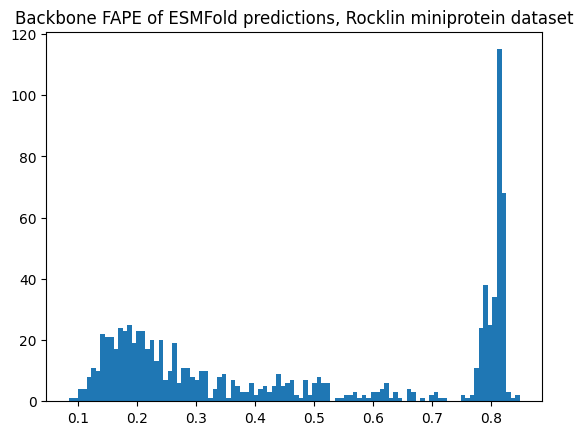

In [66]:
print(len(backbone_losses))
_ = plt.hist(backbone_losses, bins=100)
plt.title("Backbone FAPE of ESMFold predictions, Rocklin miniprotein dataset") 

In [74]:
analysis_df = pd.DataFrame({
    "filename": files_to_examine,
    "tmscore": scores,
    "backbone_fape": backbone_losses,
})
analysis_df['topology'] = analysis_df.filename.map(lambda s: s.split("_")[0])
analysis_df.head()

,filename,tmscore,backbone_fape,topology
0,HEEH_rd3_1537.pdb,0.73888,0.208970,HEEH
1,EHEE_rd2_0189.pdb,0.83683,0.814567,EHEE
2,EHEE_rd3_0229.pdb,0.78173,0.816679,EHEE
3,EEHEE_rd1_1005.pdb,0.63691,0.800233,EEHEE
4,EEHEE_rd3_0101.pdb,0.92271,0.146718,EEHEE


Text(0.5, 1.0, 'Comparison of backbone FAPE to tm-score, Rocklin mini-proteins dataset')

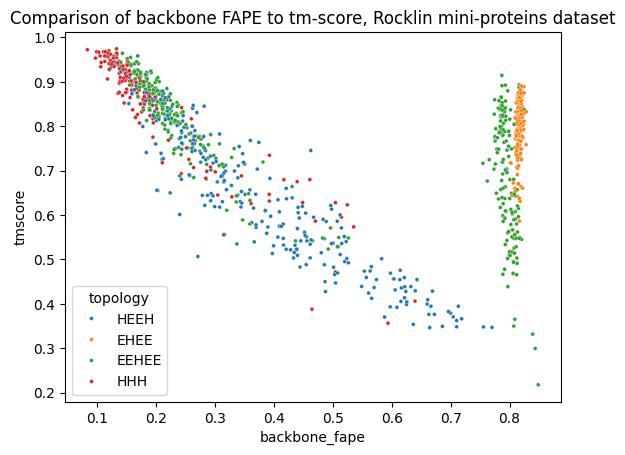

In [81]:
import seaborn as sns
sns.scatterplot(x="backbone_fape", y="tmscore", hue="topology", data=analysis_df, s=8)
plt.title("Comparison of backbone FAPE to tm-score, Rocklin mini-proteins dataset")

In [82]:
# analysis_df.to_csv("rocklin_structure_analysis_results.csv", index=False)